# 以二次迴歸預測世界人口數

## 載入套件

In [8]:
import numpy as np
import pandas as pd

## 載入資料集

In [9]:
df = pd.read_csv('./data/population.csv')
X, y = df[['year']].values, df['pop'].values

## 使用 NumPy polyfit 計算

In [10]:
coef = np.polyfit(X.reshape(-1), y, deg=2)
print(f'y={coef[0]} X^2 + {coef[1]} X + {coef[2]}')

y=-0.0002668845596210234 X^2 + 1.1420418251266993 X + -1210.2427271938489


## 繪圖

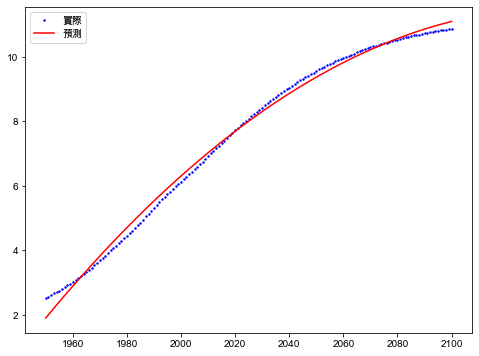

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(df['year'], y, c='blue', marker='o', s=2, label='實際')

plt.plot(df['year'].values, (df['year']**2) * coef[0]+df['year']*coef[1]+coef[2], 
         c='red', label='預測')
plt.legend();

## 使用公式預測2050年人口數

In [11]:
print((2050**2) * coef[0]+2050*coef[1]+coef[2])

9.360652508533576


## 產生 X 平方項，並與X合併

In [12]:
X_2 = X ** 2
X_new = np.concatenate((X_2, X), axis=1)
X_new.shape

(151, 2)

## 使用Scikit-Learn LinearRegression類別驗算

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_new, y)
lr.coef_, lr.intercept_

(array([-2.66884560e-04,  1.14204183e+00]), -1210.242727194026)

## 使用公式預測2050年人口數

In [14]:
print((2050**2) * lr.coef_[0]+2050*lr.coef_[1]+lr.intercept_)

9.36065250853244
